# Task C Neural network (NN) implementation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## 1.Data preprocess

### 1.1 Read the original data and show its basic inforamtions

In [2]:
raw_data = pd.read_csv('wine_2020.csv')
raw_data.head()

In [4]:
raw_data.info()
#non missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4000 non-null   float64
 1   volatile acidity      4000 non-null   float64
 2   critric acid          4000 non-null   float64
 3   residual sugar        4000 non-null   float64
 4   chlorides             4000 non-null   float64
 5   free sulfur dioxide   4000 non-null   float64
 6   total sulfur dioxide  4000 non-null   float64
 7   density               4000 non-null   float64
 8   pH                    4000 non-null   float64
 9   sulphates             4000 non-null   float64
 10  alcohol               4000 non-null   float64
 11  quality               4000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 375.1 KB


#### Here we can see there no missing value and outliers need to preprocess

### 1.2 Scale the data 
#### Scale the features and target by dividing maximum of each feature and target respectively.

In [5]:
x = raw_data.iloc[:,:-1]
x = x.div(x.max()).values

y = raw_data.iloc[:,-1]
y = y.div(y.max()).values.reshape(-1,1)
print(x.shape)

(4000, 11)


### 1.3 Initialize parameters for question(a)

#### Building a 3-layer neural network (NO bias units for the input and hidden layers), 
#### with input_layer_size= 11, hidden_layer_size= 10, output_layer_size= 1.
#### The learning rate α=0.0001.

In [7]:
input_layer_size= 11
hidden_layer_size= 10
output_layer_size= 1

alpha= 0.0001

#### Randomly initializing weights 𝑾(1) and 𝑾(2) using“np.random.seed(0)”.


np.random.seed(0)
W1= np.random.randn(input_layer_size, hidden_layer_size)
W2= np.random.randn(hidden_layer_size, output_layer_size)

## 2. Define functions used for calculations

### a) Sigmoid function
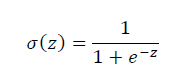

In [ ]:
def sigmoid(x):
    # our activation function: f(x) = 1 / (1 * e^(-x))
    return (1 / (1+ np.exp(-x)))

### b) Derivative of Sigmoid function
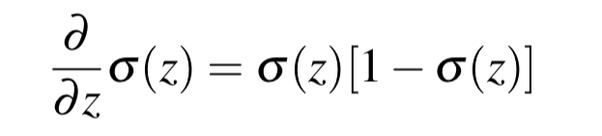

In [ ]:
def sigmoidDerivationx(y):
    return (y * (1 - y))

### c) Test error function
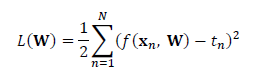

In [ ]:
def test_error(loss):
    return np.sum(np.power(loss,2))/2

## 3. Building the Neural network

### 3 steps:

a. Bulid forward propagation to get loss function

b. Bulid backward propagation to updated weight

c. Build gradient descent to get best model 

### 3.1 Forward propagation
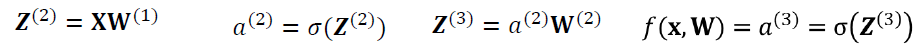

In [131]:
def forward(inputs,weight1,weight2):
    z2 = np.dot(inputs,weight1) 
    a2 = sigmoid(z2)
    z3 = np.dot(a2,weight2)
    a3 = sigmoid(z3)
    return a2,a3

### 3.2 Backward propagation
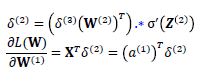
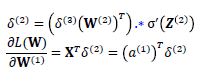

In [132]:
def backward(forward,inputs):
    delta3 = (forward[1]-y)*sigmoidDerivationx(forward[1])
    dW2 = np.dot(forward[0].T,delta3)#forward[2].T.dot(delta3)
    delta2 = (delta3*W2.T)*sigmoidDerivationx(forward[0])
    dW1 = np.dot(a1.T,delta2)
    return dW1,dW2

### 3.3 Gradient descent
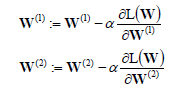

In [ ]:
def gradient_descent(weight1,weight2,dW1,dW2,alpha):
    newW1 = weight1 - alpha*dW1
    newW2 = weight2 - alpha*dW2
    return newW1,newW2   

### 3.4 Implement the integrated Neural network model

In [204]:
#store the loss to plot
loss_set=[]

for i in range(10000):
    result_forward = forward(a1,W1,W2)
    #loss = result_forward[1]-y
    result_backward = backward(result_forward,a1)
    result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
    W1 = result_gradient[0]
    W2 = result_gradient[1]
    result_forward_new = forward(a1,W1,W2)
    loss = result_forward_new[1]-y
    loss_set.append(test_error(loss))  
    



KeyboardInterrupt: 


loss_set1=[]
for i in range(10000):
    z2 = np.dot(a1,W1) 
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W2)
    a3 = sigmoid(z3)#最后的结果 但是没有做loss
    
    
    delta3 = (a3-y)*sigmoidDerivationx(a3)
    dW2 = a2.T.dot(delta3)
    delta2 = (delta3*W2.T)*sigmoidDerivationx(a2)
    dW1 = a1.T.dot(delta2)
    
    
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    
    z2 = np.dot(a1,W1)
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W2)
    a3 = sigmoid(z3)
    loss = a3 - y
    
    loss_set1.append(test_error(loss))
    
    
    



### 4. Plot the loss function values

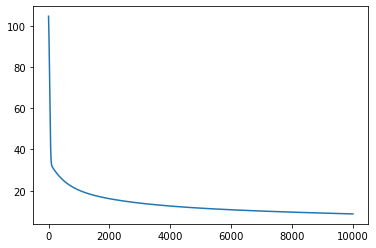

In [157]:
plt.figure()
plt.plot(np.arange(1,10001),loss_set)
plt.show()

#### Report the final loss

In [206]:
print('The final loss is : ',loss_set[-1])

The final loss is :  9.80800226083515


#### Report the final estimated weights 𝑾(1) and 𝑾(2).

In [207]:
print('The final W1 is : ',W1)

The final W1 is :  [[ 1.78547062  0.39769748  0.99447412  2.06506461  1.84888174 -1.0443066
   0.85991495  0.11385395  0.11243392  0.39913799 -0.56966047  1.43493258
   0.48363548 -0.74844856]
 [ 0.4356101   0.33873507  1.43097252 -0.12030933  0.3992562  -0.8492885
  -2.56012165  0.45673423  0.77040072 -0.73654973  2.35507491 -1.48744221
   0.14293756  0.06633631]
 [ 1.51336687  1.47924514 -0.00947064  0.65762037 -0.64823228 -1.93277518
  -0.33077414 -0.33039002  0.91948305  1.20646971  0.00595492 -0.36396568
  -0.73117146 -0.58053446]
 [-1.70684012  1.95166669 -0.52584667 -0.42164491 -1.22917243  0.77730674
  -1.61896856 -0.24448711 -0.91195992  0.38685719 -0.52317    -1.1907339
  -0.01533816  0.45298656]
 [ 0.05919472  0.31026294 -0.75795933 -0.18941066 -0.49479067 -0.33686306
  -0.82159722 -2.06598051 -0.00670012 -0.40305744 -1.47503573  0.41754813
  -0.73913256  0.41603512]
 [ 0.72928035  0.13265568  1.09590221 -1.25294265  0.46883812 -0.70964218
  -0.90837073 -0.64326051 -0.299016

In [208]:
print('The final W2 is : ',W2)

The final W2 is :  [[ 0.13703474]
 [-0.91989429]
 [ 1.02511012]
 [ 0.19452994]
 [ 0.24195636]
 [ 0.14025922]
 [-0.36766257]
 [ 1.9198487 ]
 [-0.04270422]
 [-0.10432919]
 [-1.53830791]
 [ 0.67712193]
 [-0.25430265]
 [-1.71421572]]


#### Plot the final predict target values and observed target values

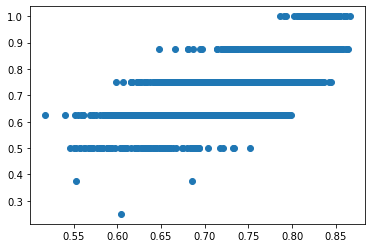

In [209]:
plt.figure()
plt.scatter(result_forward[1],y)
plt.show()

## 5. Optimize the hidden layer

Set the parameters

In [210]:
input_layer_size= 11
output_layer_size= 1

alpha= 0.0001

a1 = x

In [211]:
loss_opt_hidden = []
loss_opt_hidden_width = []

for i in range(5,15):
    #set parameter
    input_layer_size= 11
    hidden_layer_size= i
    output_layer_size= 1
    np.random.seed(0)
    W1= np.random.randn(input_layer_size, hidden_layer_size)
    W2= np.random.randn(hidden_layer_size, output_layer_size)
  
    for i in range(10000):
        result_forward = forward(a1,W1,W2)
        #loss = result_forward[1]-y
        result_backward = backward(result_forward,a1)
        result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
        W1 = result_gradient[0]
        W2 = result_gradient[1]
        result_forward_new = forward(a1,W1,W2)
        loss = result_forward_new[1]-y
        loss_opt_hidden.append(test_error(loss))
    #collect loss result of different hidden layers
    loss_opt_hidden_width.append(test_error(loss))
    


#### Best hidden layer

In [215]:
np.argmin(loss_opt_hidden_width)

9

## 6. Optimize the alpha and hidden layer

In [216]:
alpha_list = [0.001,0.0001,0.00001]

In [218]:
loss_opt_alpha = []
loss_opt_alpha_width =[]
#loss_opt_alpha_width = []

for alpha in alpha_list:
    for i in range(5,15):
    #set parameter
        input_layer_size= 11
        hidden_layer_size= i
        output_layer_size= 1 
        
        np.random.seed(0)
        W1= np.random.randn(input_layer_size, hidden_layer_size)
        W2= np.random.randn(hidden_layer_size, output_layer_size)
        
        for i in range(10000):
            result_forward = forward(a1,W1,W2)
            #loss = result_forward[1]-y
            result_backward = backward(result_forward,a1)
            result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
            W1 = result_gradient[0]
            W2 = result_gradient[1]
            result_forward_new = forward(a1,W1,W2)
            loss = result_forward_new[1]-y
            #loss_opt_alpha(test_error(loss))
        loss_opt_alpha_width.append(test_error(loss))
    

#### Best alpha and hidden layer

In [225]:
np.reshape(loss_opt_alpha_width,(3,10))

array([[ 5.97079807,  5.92417922,  5.87118072,  5.88153585,  5.90411323,
         5.89759423,  5.85249541,  5.89330079,  5.93078535,  5.8602683 ],
       [13.13209694,  8.55809719, 10.93011603, 12.61687602,  8.6568066 ,
         8.7247703 ,  9.2814904 , 10.25027712, 10.34182119,  7.69753169],
       [18.6019262 , 17.07558573, 16.19128894, 18.86251301, 15.43201762,
        20.23077737, 19.60219386, 15.32363126, 20.73734031, 21.93805799]])

In [226]:
print('The best alpha is: ', 0.001,'The best hidden layer is : ',11)

The best alpha is:  0.001 The best hidden layer is :  11


## 7. Optimize hidden layer, alpha and iteration time 

In [190]:
alpha_list = [0.001,0.0001,0.00001]
iteration_list = [1000,5000,10000,20000,50000]
a1 = x

In [192]:
loss_opt_iterate = []
loss_opt_iterate_width =[]
#loss_opt_iterate_width = []

for iterate in iteration_list:
    for alpha in alpha_list:
        for i in range(8,15):
    #set parameter
            input_layer_size= 11
            hidden_layer_size= i
            output_layer_size= 1 
        
            np.random.seed(0)
            W1= np.random.randn(input_layer_size, hidden_layer_size)
            W2= np.random.randn(hidden_layer_size, output_layer_size)
        
            a1 = x 
        #set alpha
        #alpha= 0.0001
        #set a1 = feature dataset        
            for i in range(iterate):
                result_forward = forward(a1,W1,W2)
            #loss = result_forward[1]-y
                result_backward = backward(result_forward,a1)
                result_gradient = gradient_descent(W1,W2,result_backward[0],result_backward[1],alpha)
                W1 = result_gradient[0]
                W2 = result_gradient[1]
                result_forward_new = forward(a1,W1,W2)
                loss = result_forward_new[1]-y
                loss_opt_iterate.append(test_error(loss))
    #collect loss result of different hidden layers
            loss_opt_iterate_width.append(test_error(loss))#7x3x5 个
        #loss_opt_alpha_width.append(test_error(loss))
    #loss_opt_alpha_width.append(loss_opt_hidden_alpha_width)#min

#### Best hidden layer,alpha and iteration time

In [235]:
np.argmin(loss_opt_iterate_width)
np.reshape(loss_opt_iterate_width, (5,3,7))

#best parameter

array([[[12.61792319,  8.6578018 ,  8.72741097,  9.28334899,
         10.25274534, 10.3438457 ,  7.69045101],
        [18.86180108, 15.43068427, 20.23138648, 19.60109555,
         15.32414919, 20.73578471, 21.93971908],
        [23.71750602, 27.20014225, 32.61510362, 28.52342006,
         16.64672021, 34.63583812, 34.89587684]],

       [[ 6.12681203,  6.09656728,  5.95376287,  5.9784545 ,
          6.12355779,  6.03021698,  6.02413488],
        [14.38362202, 10.30244413, 11.51331437, 11.56201728,
         12.09295935, 13.10445806, 10.12157887],
        [20.95621044, 19.4810575 , 24.83797748, 23.35470854,
         16.00356202, 25.23771422, 27.18961106]],

       [[ 5.88153585,  5.90411323,  5.89759423,  5.85249541,
          5.89330079,  5.93078535,  5.8602683 ],
        [12.61687602,  8.6568066 ,  8.7247703 ,  9.2814904 ,
         10.25027712, 10.34182119,  7.69753169],
        [18.86251301, 15.43201762, 20.23077737, 19.60219386,
         15.32363126, 20.73734031, 21.93805799]],

    

In [227]:
#hidden layer = 9
#alpha = 0.001
#iter = 50000
print('The best alpha is: ', 0.0001,'The best hidden layer is : ',9 , 'The best iteration time is : ',50000)

The best alpha is:  0.001 The best hidden layer is :  9 The best iteration time is :  50000
